In [219]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [220]:
# round
def round_down(x, a):
    return round(math.floor(x / a) * a, 2)

In [2]:
!cat readme.txt

sales_history.csv - история продаж

'salerevenuerub' - продажи в руб.,
'soldpieces' - в шт.,
'skutertiaryid' - уникальный идентификатор товара,
'posid' - уникальный идентификатор магазина,
'sale_dt' - дата продажи (данные понедельные),


promo_history.xlsx - история промо-акций

'start_dttm' - дата начала акции,
'end_dttm' - дата окончания акции,
'skutertiaryid' - уникальный идентификатор товара,
'promotypeid' - тип промо-акции,
'chaindiscountvalue' - размер скидки.


In [ ]:
df_sales = pd.read_csv('sales_history.csv', index_col=0)

In [4]:
print(df_sales.shape)
# 15 259 994
df_sales.sample(5)

(15259994, 5)


,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt
6431161,1255.500000,20,7232,271422,2019-04-01
1200074,680.850324,9,7194,274661,2018-07-02
16721129,30.393600,4,7236,271341,2020-07-27
7234498,1253.070000,51,7193,271292,2019-05-01
15636484,415.503000,5,7232,292582,2020-05-25


In [100]:
df_promo = pd.read_csv('promo_history.csv', sep=';', index_col=0, decimal=',')
df_promo.sample(5)

,start_dttm,end_dttm,skutertiaryid,promotypeid,chaindiscountvalue,0
107,2021-03-17 00:00:00,2021-03-23 00:00:00,7189,70,0.400000,636
158,2021-06-30 00:00:00,2021-07-06 00:00:00,7205,70,0.250000,636
33,2019-07-31 00:00:00,2019-08-06 00:00:00,7232,70,0.174171,556
129,2021-04-28 00:00:00,2021-05-11 00:00:00,7234,70,0.250000,954
113,2021-03-31 00:00:00,2021-04-06 00:00:00,7205,70,0.200000,636


---

#### EDA sales

In [8]:
# 10 sku totaly
df_sales['skutertiaryid'].value_counts(dropna=False, normalize=True).round(3)

7234    0.129
7205    0.128
7194    0.123
7193    0.113
7182    0.098
7189    0.088
7232    0.086
7236    0.081
7247    0.080
7238    0.074
Name: skutertiaryid, dtype: float64

In [9]:
print(df_sales['posid'].nunique())
df_sales['posid'].value_counts(dropna=False, normalize=True).head(5)

14518


276130    0.000108
292526    0.000107
286167    0.000103
279250    0.000103
276128    0.000103
Name: posid, dtype: float64

In [10]:
df_sales_copy = df_sales.copy()
df_sales_copy['sale_dt'] = pd.to_datetime(df_sales_copy['sale_dt'])

In [11]:
df_sales_agg = df_sales_copy\
    .groupby('sale_dt')[['skutertiaryid']].count()\
    .reset_index()\
    .rename(columns={'skutertiaryid': 'count'})

In [ ]:
# sales by time
plt.figure(figsize=(20, 8))

plt.plot(
    df_sales_agg['sale_dt'],
    df_sales_agg['count'],
    color='blue', 
    linewidth=3
);

plt.title('cnt total sales by time');
plt.rcParams.update({'font.size': 20});

In [14]:
# mean week price by time by each sku

df_sales_copy = df_sales_copy[df_sales_copy['soldpieces'] > 0.01]
df_sales_copy['price'] = df_sales_copy['salerevenuerub']/df_sales_copy['soldpieces']
df_mean_price = df_sales_copy\
    .groupby(['sale_dt', 'skutertiaryid'])[['price']].mean()\
    .reset_index()

In [124]:
# a = df_sales_copy[
#     (df_sales_copy['sale_dt'] == '2018-09-10')&
#     (df_sales_copy['skutertiaryid'] == 7182)
# ]

In [ ]:
#4.65215	0	7182	286231	2018-09-10	inf

In [15]:
df_mean_price.head()

,sale_dt,skutertiaryid,price
0,2018-04-23,7182,83.651286
1,2018-04-23,7189,20.765593
2,2018-04-23,7193,29.412636
3,2018-04-23,7194,67.055305
4,2018-04-23,7205,17.186841


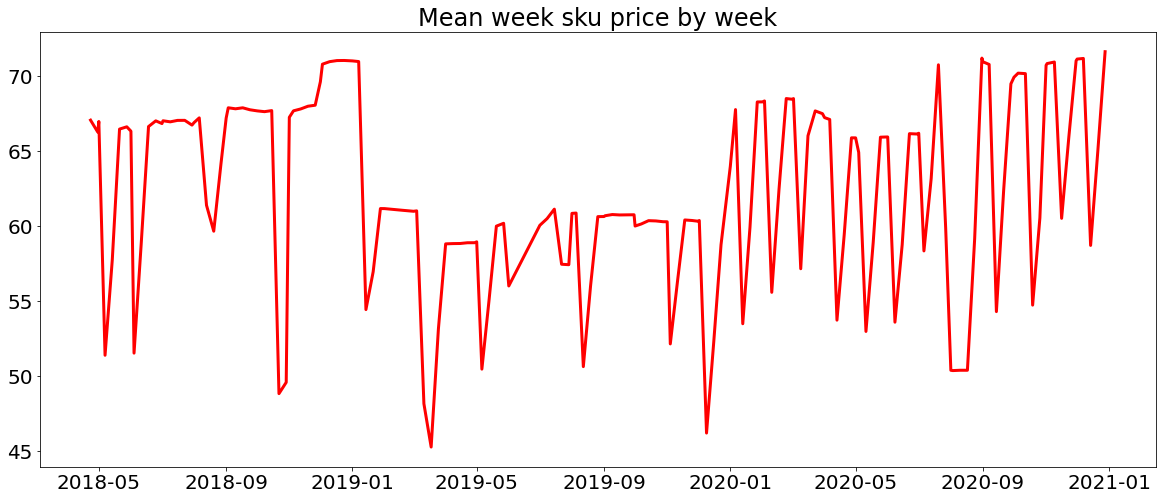

In [234]:
# sales by time
plt.figure(figsize=(20, 8))

sku = 7194
ids = df_mean_price['skutertiaryid'] == sku

plt.plot(
    df_mean_price[ids]['sale_dt'],
    df_mean_price[ids]['price'],
    color='red', 
    linewidth=3
);

plt.title('Mean week sku price by week');
plt.rcParams.update({'font.size': 20});
plt.savefig('plots/price')

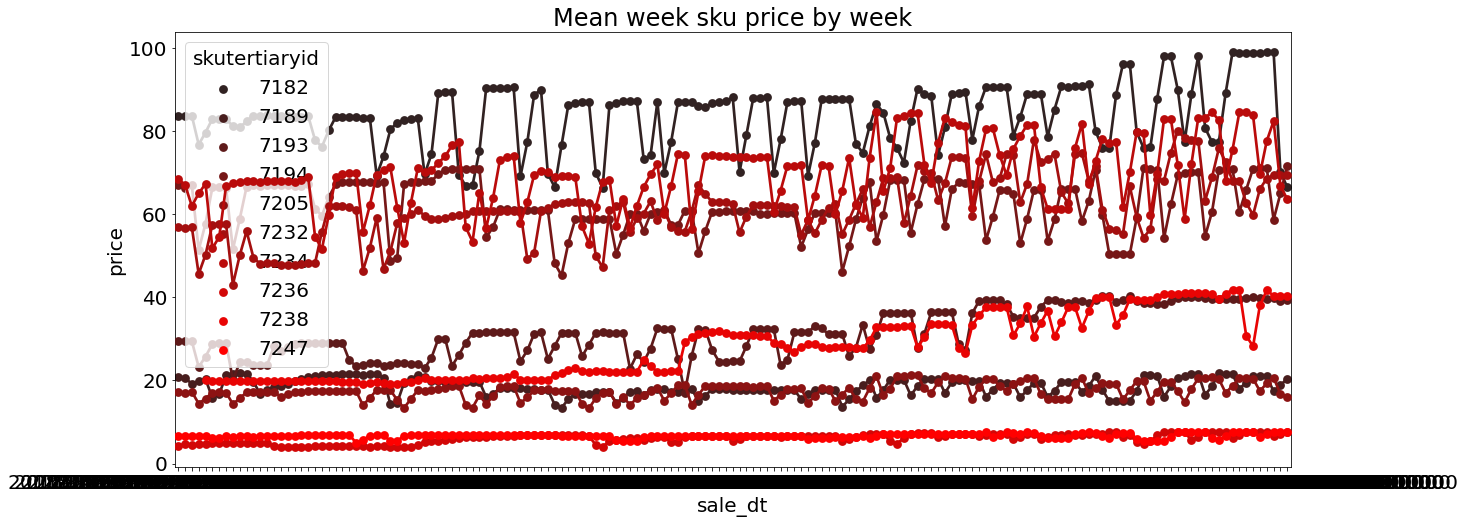

In [29]:
# sales by time
plt.figure(figsize=(20, 8))

sns.pointplot(
    data=df_mean_price,
    x='sale_dt',
    y='price',
    hue='skutertiaryid',
    color='red', 
    linewidth=3
);

plt.title('Mean week sku price by week');
plt.rcParams.update({'font.size': 20});

In [69]:
df_sales_copy.sample(2)

,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt,price
3389031,52.793719,1,7234,271893,2018-11-05,52.793719
10168592,52.641600,8,7236,271946,2019-10-14,6.580200


In [ ]:
df_mean_price_pos = df_sales_copy\
    .groupby(['sale_dt', 'skutertiaryid', 'posid'])[['price']].mean()\
    .reset_index()

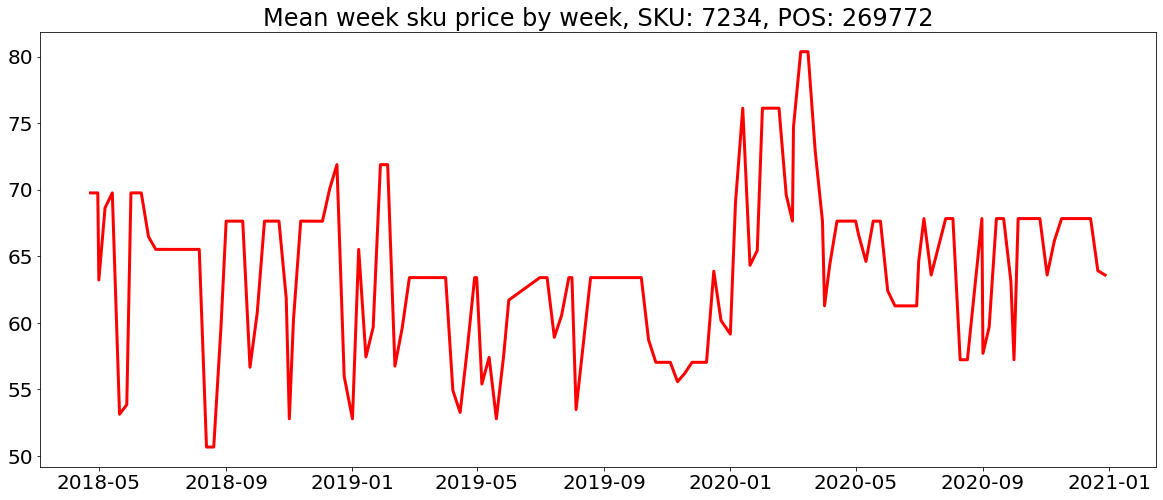

In [235]:
sku = 7234
pos = 269772
ids = (df_mean_price_pos['skutertiaryid'] == sku)&(df_mean_price_pos['posid'] == pos)

# sales by time
plt.figure(figsize=(20, 8))

plt.plot(
    df_mean_price_pos[ids]['sale_dt'],
    df_mean_price_pos[ids]['price'],
    color='red', 
    linewidth=3
);

plt.title(f'Mean week sku price by week, SKU: {sku}, POS: {pos}');
plt.rcParams.update({'font.size': 20});
plt.savefig('plots/mean_price_sku_pos')

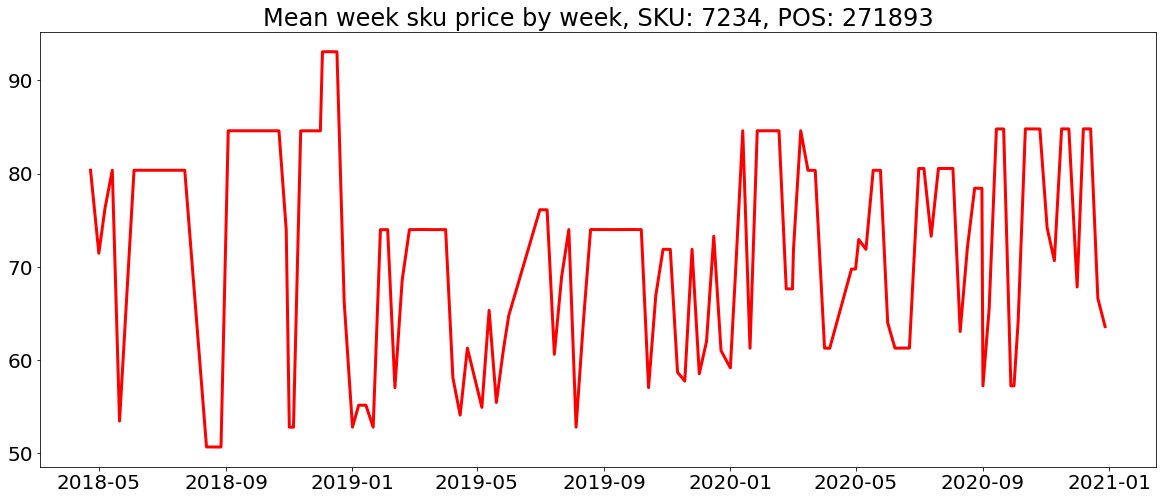

In [237]:
sku = 7234
pos = 271893
ids = (df_mean_price_pos['skutertiaryid'] == sku)&(df_mean_price_pos['posid'] == pos)

# sales by time
plt.figure(figsize=(20, 8))

plt.plot(
    df_mean_price_pos[ids]['sale_dt'],
    df_mean_price_pos[ids]['price'],
    color='red', 
    linewidth=3
);

plt.title(f'Mean week sku price by week, SKU: {sku}, POS: {pos}');
plt.rcParams.update({'font.size': 20});
plt.savefig('plots/price')

In [66]:
ids_week = (df_sales_copy['skutertiaryid'] == sku)\
    &(df_sales_copy['posid'] == pos)
 #   &(df_sales_copy['sale_dt'] == '2020-09-28')

df_tmp = df_sales_copy[ids_week]

In [ ]:
# внутри одного магазина товар продается с разной ценой

In [142]:
df_sales_copy.head()

,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt,price
0,174.41639,2,7182,293136,2018-04-30,87.208195
1,261.64140,3,7182,293136,2018-04-23,87.213800
2,78.75025,1,7182,296672,2018-04-30,78.750250
3,630.03563,8,7182,296672,2018-04-23,78.754454
4,239.12051,3,7182,296833,2018-04-30,79.706837


In [168]:
# sales revenue total by month
df_sold = df_sales_copy\
    .groupby(['sale_dt', 'skutertiaryid'])[['soldpieces']].sum()\
    .reset_index()

df_sold['sale_dt'] = df_sold['sale_dt'].dt.strftime('%Y-%m-%d')
df_sold.head(2)

,sale_dt,skutertiaryid,soldpieces
0,2018-04-23,7182,48862
1,2018-04-23,7189,26343


In [169]:
# special week: 2019-06-01
df_sold

df_sold\
    .sort_values('soldpieces', ascending=False)\
    .head(5)

,sale_dt,skutertiaryid,soldpieces
682,2019-06-01,7234,1591927
679,2019-06-01,7194,1514220
680,2019-06-01,7205,1385329
678,2019-06-01,7193,1328394
681,2019-06-01,7232,660024


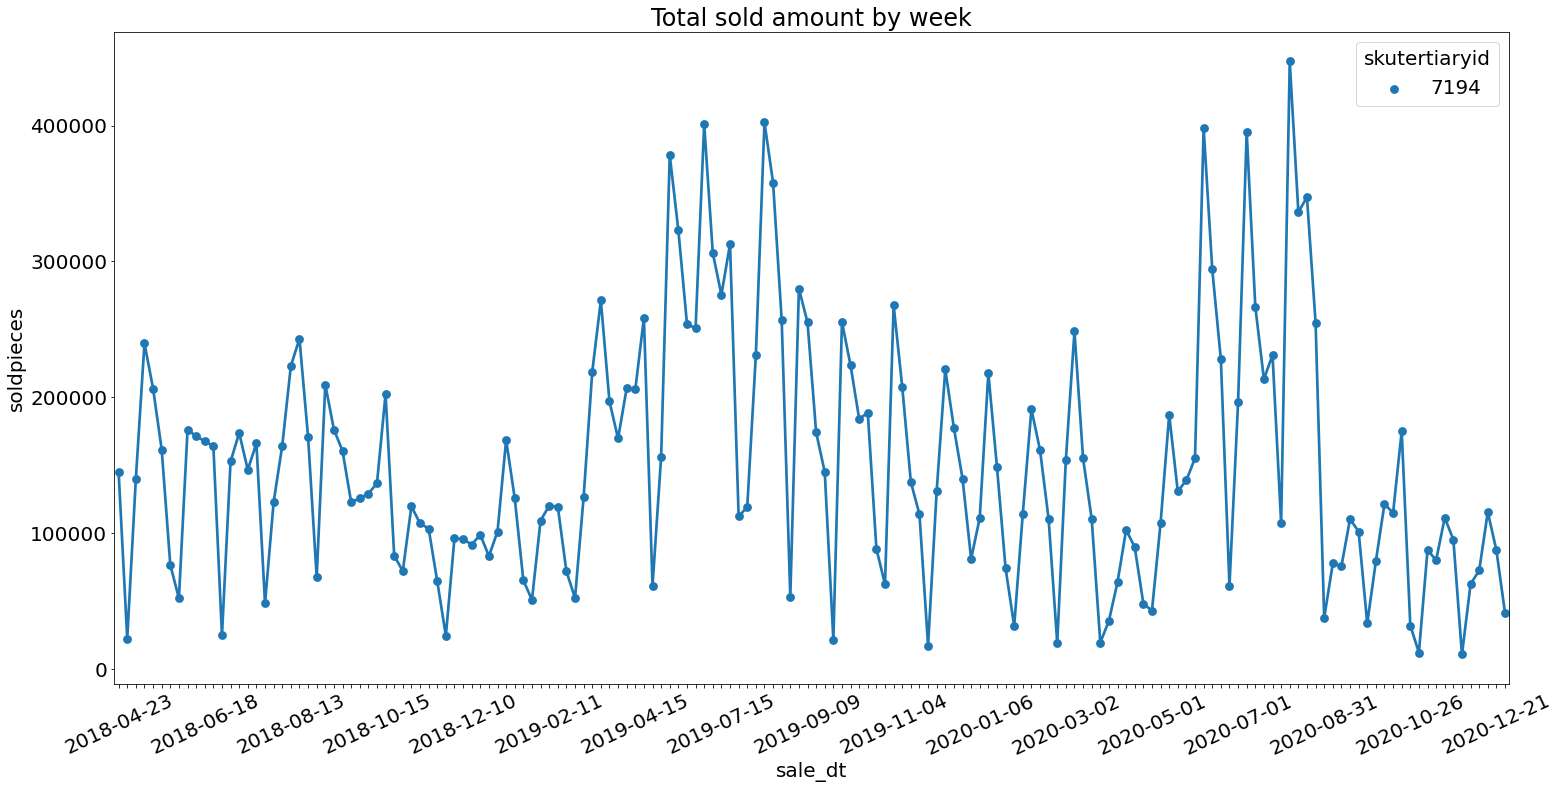

In [178]:
# total revenue by time
plt.figure(figsize=(25, 12))
id_filter = df_sold['sale_dt'] != '2019-06-01'
sku_select = df_sold['skutertiaryid'].isin({7194})

plot = sns.pointplot(
    data=df_sold[id_filter&sku_select],
    x='sale_dt',
    y='soldpieces',
    hue='skutertiaryid',
    linewidth=3
);

plt.title(f'Total sold amount by week');
plt.rcParams.update({'font.size': 20});
plt.xticks(rotation=25);
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
        
#plt.savefig('plots/total_sold_amount_sku')

In [183]:
df_sold[
    (df_sold['skutertiaryid'] == 7194)&\
    (df_sold['sale_dt'] >= '2020-05-01')
]    

,sale_dt,skutertiaryid,soldpieces
1209,2020-05-01,7194,42722
1219,2020-05-04,7194,107152
1229,2020-05-11,7194,186899
1239,2020-05-18,7194,130595
1249,2020-05-25,7194,138839
1259,2020-06-01,7194,154970
1269,2020-06-08,7194,398087
1279,2020-06-15,7194,294196
1289,2020-06-22,7194,227785
1299,2020-06-29,7194,61016


---

In [101]:
df_promo['start_dttm'] = df_promo['start_dttm'].str.slice(0, 10)
df_promo['end_dttm'] = df_promo['end_dttm'].str.slice(0, 10)

In [102]:
df_promo['skutertiaryid'].value_counts()

7234    17
7205    17
7182    15
7194    11
7189    11
7236     8
7232     8
7247     6
7193     6
7238     4
Name: skutertiaryid, dtype: int64

In [103]:
df_promo['promotypeid'].value_counts()

70    97
67     4
77     1
68     1
Name: promotypeid, dtype: int64

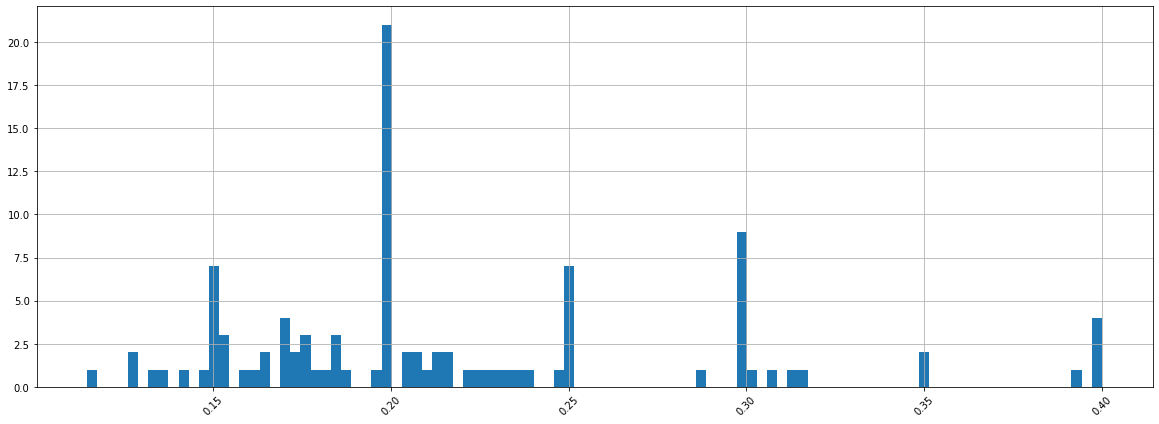

In [104]:
plt.figure(figsize=(20,7))
df_promo['chaindiscountvalue'].hist(bins=100);
plt.xticks(rotation=45);

In [112]:
df_cnt = df_promo.groupby('start_dttm')[['promotypeid']]\
    .count().rename(columns={'promotypeid': 'count'})\
    .reset_index().sort_values('start_dttm')

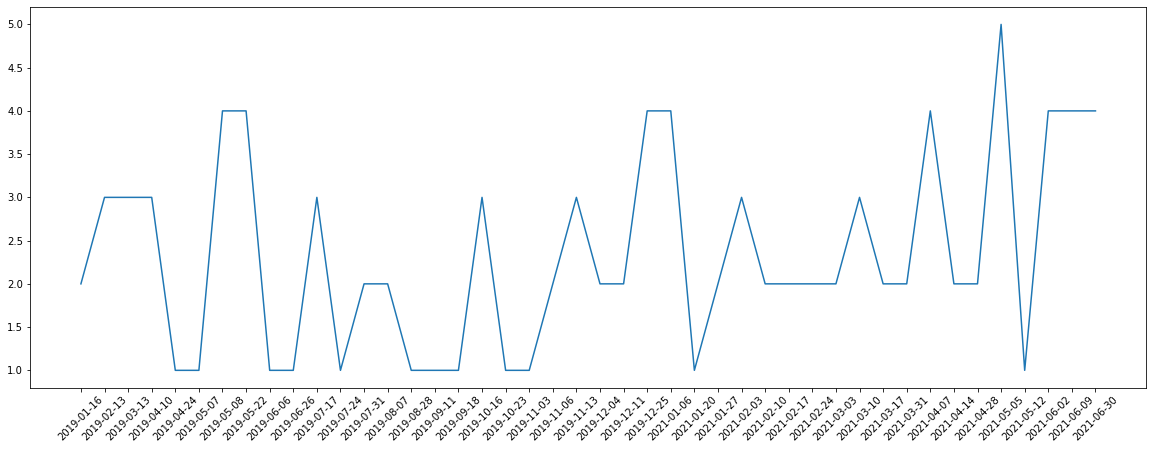

In [117]:
plt.figure(figsize=(20,7))
plt.plot(
    df_cnt['start_dttm'],
    df_cnt['count']
);

plt.xticks(rotation=45);

In [139]:
dur = (pd.to_datetime(df_promo['end_dttm']) - pd.to_datetime(df_promo['start_dttm'])).dt.days
dur.value_counts()

6      78
13     20
0       2
28      1
27      1
147     1
dtype: int64

In [140]:
#plt.figure(figsize=(20,7))
#plt.hist(dur[dur<100], bins=100);

In [230]:
# get historical discounts for each sku:
max_sale_dt = '2021-01-01'

df_promo['discount'] = df_promo['chaindiscountvalue'].round(3)
df_discounts = df_promo[df_promo['end_dttm'] < max_sale_dt]\
    .groupby('skutertiaryid')\
    .agg({
        'discount':  lambda x: set(x)
    })\
    .reset_index()

df_discounts['discount_step'] = df_discounts['discount']\
    .apply(lambda x: {round_down(y, 0.05) for y in x})

df_discounts.to_csv('hist_discounts.csv', index=False)
df_discounts

,skutertiaryid,discount,discount_step
0,7182,"{0.234, 0.195, 0.23, 0.199, 0.146, 0.205, 0.20...","{0.2, 0.1, 0.15}"
1,7189,"{0.214, 0.134, 0.313, 0.173}","{0.2, 0.1, 0.3, 0.15}"
2,7193,"{0.185, 0.392, 0.175, 0.3, 0.153, 0.287}","{0.15, 0.35, 0.25}"
3,7194,"{0.209, 0.136, 0.307, 0.164}","{0.2, 0.1, 0.3, 0.15}"
4,7205,"{0.228, 0.221, 0.165, 0.215, 0.154, 0.185, 0.2...","{0.2, 0.15}"
5,7232,"{0.128, 0.174}","{0.1, 0.15}"
6,7234,"{0.239, 0.163, 0.217, 0.204, 0.142, 0.181, 0.2...","{0.2, 0.1, 0.15}"
7,7236,"{0.185, 0.214, 0.186}","{0.15, 0.2}"
8,7238,"{0.115, 0.154}","{0.1, 0.15}"


---